<strong><font size="7">Network Science</font><br>
<font size="5">US Airport Dataset - Exploratory Analysis</font><br>
<font size="4">- Haddad Philip</font><br>

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This dataset contains data for 25 years [1995-2015] of flights between various US airports and metadata about these routes. <br> Taken from Bureau of Transportation Statistics, United States Department of Transportation.

Information of number of people that fly every year on a particular route on the list of airlines that fly that route.

In [2]:
df = pd.read_csv('passengers.csv')

In [3]:
df.head(5)

,Unnamed: 0,YEAR,ORIGIN,DEST,UNIQUE_CARRIER_NAME,PASSENGERS
0,0,1990,ABE,ACY,{'US Airways Inc.'},73.0
1,1,1990,ABE,ATL,{'Eastern Air Lines Inc.'},73172.0
2,2,1990,ABE,AVL,{'Westair Airlines Inc.'},0.0
3,3,1990,ABE,AVP,"{'Westair Airlines Inc.', 'US Airways Inc.', '...",8397.0
4,4,1990,ABE,BHM,{'Eastern Air Lines Inc.'},59.0


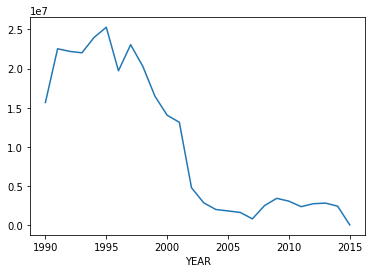

In [4]:
df[df["UNIQUE_CARRIER_NAME"] == "{'US Airways Inc.'}"].groupby(["YEAR"])["PASSENGERS"].sum().plot()

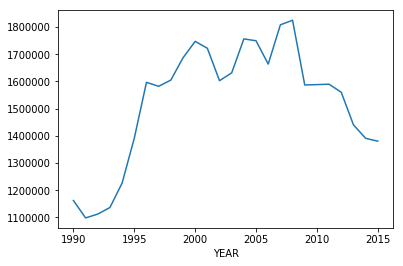

In [5]:
df[df.DEST == 'BHM'].groupby(['YEAR'])['PASSENGERS'].sum().plot()

## Multi Directed Graph from the dataset

In [6]:
passenger_graph = nx.from_pandas_edgelist(df, source='ORIGIN', target='DEST',
                                          edge_attr=['YEAR', 'PASSENGERS', 'UNIQUE_CARRIER_NAME'],
                                          create_using=nx.MultiDiGraph())

### Number of people fly from San Fran to NYC

In [7]:
passenger_graph['SFO']['JFK'][25]

{'YEAR': 2015,
 'PASSENGERS': 1187327.0,
 'UNIQUE_CARRIER_NAME': "{'Delta Air Lines Inc.', 'Virgin America', 'American Airlines Inc.', 'Sun Country Airlines d/b/a MN Airlines', 'JetBlue Airways', 'United Air Lines Inc.'}"}

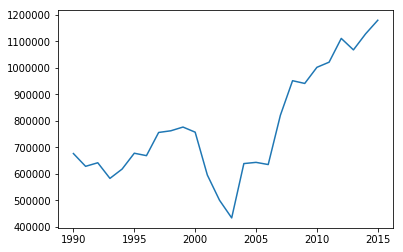

In [8]:
temp = [(i['YEAR'], i['PASSENGERS'])for i in dict(passenger_graph['JFK']['SFO']).values()]
x, y = zip(*temp)
plt.plot(x, y)
plt.show()

## Finding the busiest route in 1990 and in 2015 according to number of passengers

In [9]:
temp = df.groupby(['YEAR'])['PASSENGERS'].transform(max) == df['PASSENGERS']

In [10]:
df[temp][df.YEAR.isin([1990, 2015])]

/home/philip/miniconda3/envs/ns/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,YEAR,ORIGIN,DEST,UNIQUE_CARRIER_NAME,PASSENGERS
3917,3917,1990,LAX,HNL,"{'Heavylift Cargo Airlines Lt', 'Hawaiian Airl...",1827164.0
445978,445978,2015,LAX,SFO,"{'Hawaiian Airlines Inc.', 'Delta Air Lines In...",1869066.0


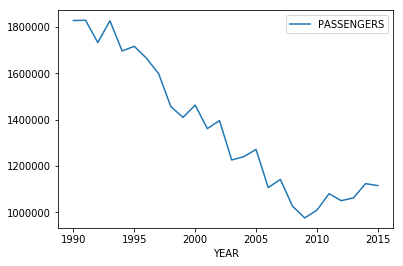

In [11]:
df[(df['ORIGIN'] == 'LAX') & (df['DEST'] == 'HNL')].plot('YEAR', 'PASSENGERS')

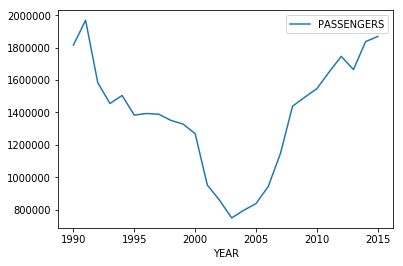

In [12]:
df[(df['ORIGIN'] == 'LAX') & (df['DEST'] == 'SFO')].plot('YEAR', 'PASSENGERS')

## Extracting year graph from passenger_graph

In [13]:
def year_network(G, year):
    temp_g = nx.DiGraph()
    for i in G.edges(data=True):
        if i[2]['YEAR'] == year:
            temp_g.add_edge(i[0], i[1], weight=i[2]['PASSENGERS'])
    return temp_g

In [14]:
pass_2015 = year_network(passenger_graph, 2015)

In [15]:
print(len(pass_2015), len(pass_2015.edges()))

1258 25354


### Load in the GPS coordinates of all the airports

In [16]:
lat_long = pd.read_csv('GlobalAirportDatabase.txt', delimiter=':', header=None)

In [17]:
lat_long[lat_long[1].isin(list(pass_2015.nodes()))]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1321,EGYC,CLF,COLTISHALL,COLTISHALL,ENGLAND,52,45,17,N,1,21,26,E,21,52.755,1.357
3380,KABI,ABI,ABILENE RGNL,ABILENE,USA,32,24,40,N,99,40,54,W,546,32.411,-99.682
3381,KABQ,ABQ,NaN,ALBUQUERQUE,USA,0,0,0,U,0,0,0,U,0,0.000,0.000
3382,KACK,ACK,NANTUCKET MEM,NANTUCKET,USA,41,15,10,N,70,3,36,W,15,41.253,-70.060
3383,KACT,ACT,WACO RGNL,WACO,USA,31,36,40,N,97,13,49,W,158,31.611,-97.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8024,TJCP,CPX,NaN,CULEBRA,PUERTO RICO,0,0,0,U,0,0,0,U,0,0.000,0.000
8027,TJIG,SIG,FERNANDO LUIS RIBAS DOMINICCI,SAN JUAN,PUERTO RICO,18,27,24,N,66,5,53,W,4,18.457,-66.098
8028,TJMZ,MAZ,EUGENIO MARIA DE HOSTOS,MAYAGUEZ,PUERTO RICO,18,15,20,N,67,8,54,W,9,18.256,-67.148
8030,TJPS,PSE,MERCEDITA,PONCE,PUERTO RICO,18,0,29,N,66,33,46,W,8,18.008,-66.563


In [18]:
pos_dict = {}
for airport in lat_long[lat_long[1].isin(list(pass_2015.nodes()))].iterrows():
    pos_dict[airport[1][1]] = (airport[1][15], airport[1][14]) 

In [19]:
# pos_dict

## Plot of the airports (nodes & edges)

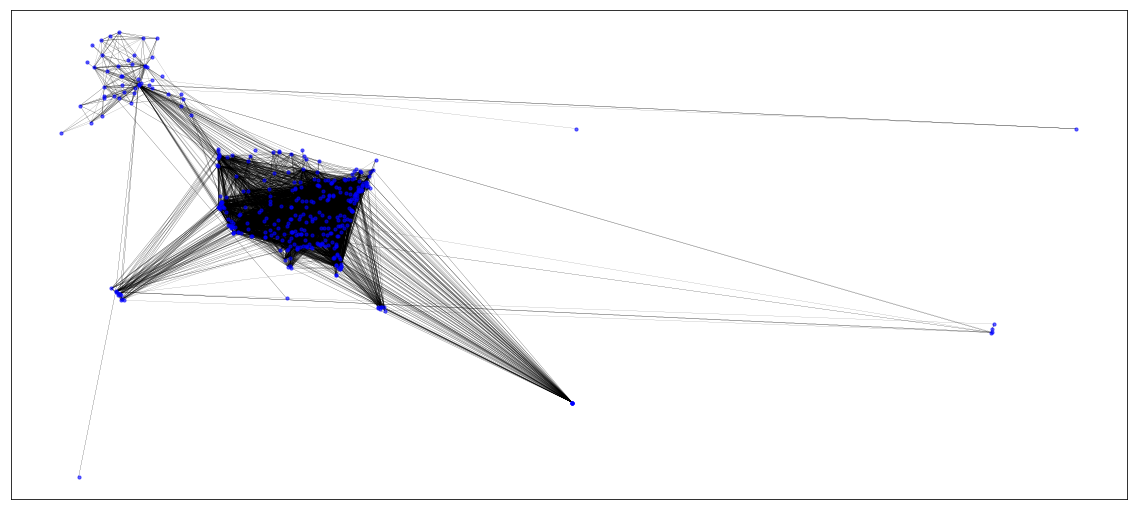

In [20]:
plt.figure(figsize=(20, 9))
G = nx.subgraph(pass_2015, pos_dict.keys())
nx.draw_networkx_nodes(G, pos=pos_dict, node_size=10, alpha=0.6, node_color='b')
nx.draw_networkx_edges(G, pos=pos_dict, width=0.1, arrows=False)
plt.show()

## Degree distribution of this network

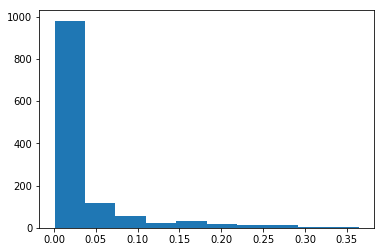

In [21]:
plt.hist(list(nx.degree_centrality(pass_2015).values()))
plt.show()

## Plot a log log plot to get a better overview of this.

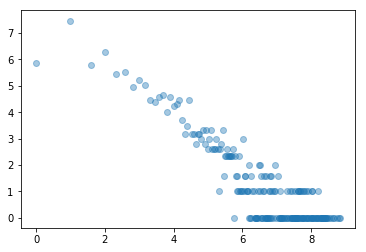

In [22]:
d = {}
for i, j in dict(nx.degree(pass_2015)).items():
    if j in d:\
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.4)
plt.show()

## How reachable is this network?

Calculating the average shortest path length of this network, it gives us an idea about the number of jumps we need to make around the network to go from one airport to any other airport in this network. However this network is not connected

In [23]:
try:
    nx.average_shortest_path_length(pass_2015)
except:
    print("No shortest path because the graph is not connected!")

No shortest path because the graph is not connected!


#### We have 3 components

In [26]:
len(list(nx.weakly_connected_components(pass_2015)))

3

In [27]:
df[(df['YEAR'] == 2015) & (df['ORIGIN'] == 'AIK')]

,Unnamed: 0,YEAR,ORIGIN,DEST,UNIQUE_CARRIER_NAME,PASSENGERS
433338,433338,2015,AIK,AIK,{'Wright Air Service'},0.0


### To make the graph connected let's remove the smallest weak comp. SPB, SSB, AIK

In [28]:
pass_2015.remove_nodes_from(['SPB', 'SSB', 'AIK'])

In [29]:
nx.is_weakly_connected(pass_2015)

True

In [30]:
nx.is_strongly_connected(pass_2015)

False

In [31]:
nx.is_strongly_connected(G)

False

In [33]:
len(list(nx.strongly_connected_components(pass_2015)))

66

In [34]:
df[(df['YEAR'] == 2015) & (df['DEST'] == 'TSP')]

,Unnamed: 0,YEAR,ORIGIN,DEST,UNIQUE_CARRIER_NAME,PASSENGERS
450245,450245,2015,ONT,TSP,{'Federal Express Corporation'},0.0


In [35]:
pass_2015_strong = max(nx.strongly_connected_component_subgraphs(pass_2015), key=len)

In [36]:
len(pass_2015_strong)

1190

In [37]:
nx.average_shortest_path_length(pass_2015_strong)

3.174661992635574

Decreasing the avg shortest path length of this network by adding new edges to decrease the avg shortest path length.

In [38]:
sort_degree = sorted(nx.degree_centrality(pass_2015_strong).items(), key=lambda x:x[1], reverse=True)
top_count = 0
for n, v in sort_degree:
    count = 0
    for node, val in sort_degree:
        if node != n:
            if node not in pass_2015_strong.adj[n]:
                pass_2015_strong.add_edge(n, node)
                count += 1
                if count == 25:
                    break
    top_count += 1
    if top_count == 20:
        break

In [39]:
nx.average_shortest_path_length(pass_2015_strong)

3.0888508809747615

### Specific Airline reachability

In [40]:
passenger_graph['JFK']['SFO'][25]

{'YEAR': 2015,
 'PASSENGERS': 1179941.0,
 'UNIQUE_CARRIER_NAME': "{'Delta Air Lines Inc.', 'Virgin America', 'American Airlines Inc.', 'Sun Country Airlines d/b/a MN Airlines', 'JetBlue Airways', 'Vision Airlines', 'United Air Lines Inc.'}"}

In [41]:
def str_to_list(a):
    return a[1:-1].split(', ')

In [42]:
for i in str_to_list(passenger_graph['JFK']['SFO'][25]['UNIQUE_CARRIER_NAME']):
    print(i)

'Delta Air Lines Inc.'
'Virgin America'
'American Airlines Inc.'
'Sun Country Airlines d/b/a MN Airlines'
'JetBlue Airways'
'Vision Airlines'
'United Air Lines Inc.'


In [43]:
for origin, dest in passenger_graph.edges():
    for key in passenger_graph[origin][dest]:
        passenger_graph[origin][dest][key]['airlines'] = str_to_list(passenger_graph[origin][dest][key]['UNIQUE_CARRIER_NAME'])

## Network for United Airlines

In [44]:
united_network = nx.DiGraph()
for origin, dest in passenger_graph.edges():
    if 25 in passenger_graph[origin][dest]:
        if "'United Air Lines Inc.'" in passenger_graph[origin][dest][25]['airlines']:
            united_network.add_edge(origin, dest, weight=passenger_graph[origin][dest][25]['PASSENGERS'])

In [45]:
len(united_network)

134

In [46]:
len(united_network.edges())

1097

In [47]:
sorted(nx.pagerank(united_network, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('ORD', 0.09229686412847604),
 ('DEN', 0.06951536832747153),
 ('LAX', 0.05547087049076451),
 ('SFO', 0.04520212084776551),
 ('IAH', 0.04398280474534501),
 ('EWR', 0.03754166218607773),
 ('ATL', 0.034778751100523315),
 ('DFW', 0.03419728511206331),
 ('PHX', 0.025365344038763896),
 ('MSP', 0.022269133819322266)]

In [48]:
sorted(nx.degree_centrality(united_network).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ORD', 1.1729323308270676),
 ('DEN', 0.9172932330827067),
 ('IAH', 0.8195488721804511),
 ('EWR', 0.744360902255639),
 ('SFO', 0.5789473684210527),
 ('LAX', 0.5338345864661653),
 ('IAD', 0.5112781954887218),
 ('CLE', 0.39849624060150374),
 ('STL', 0.3609022556390977),
 ('PHL', 0.3308270676691729)]

In [49]:
pos_dict = {}
for airport in lat_long[lat_long[1].isin(list(united_network.nodes()))].iterrows():
    pos_dict[airport[1][1]] = (airport[1][15], airport[1][14]) 

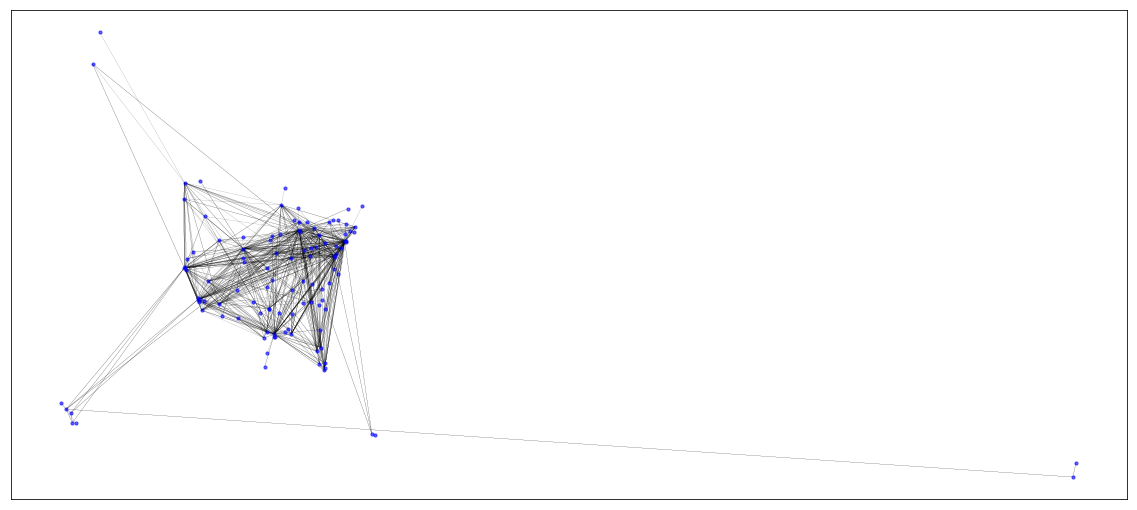

In [50]:
plt.figure(figsize=(20, 9))
G = nx.subgraph(united_network, pos_dict.keys())
nx.draw_networkx_nodes(G, pos=pos_dict, node_size=10, alpha=0.6, node_color='b')
nx.draw_networkx_edges(G, pos=pos_dict, width=0.1, arrows=False)
plt.show()